In [6]:
import pandas as pd
import numpy as np

## Reading Files
---
* dataset that query from pySpark

In [7]:
# reading file (query from pySpark)
# original_df = pd.read_csv("../PySpark_SQL/output_csv/Perth_housing_Neural.csv")
original_df = pd.read_csv("../PySpark_SQL/output_csv/Perth_housing_ML.csv")
# original_df = pd.read_csv("../DataCleaning/output/Perth_housing_ML.csv")
original_df

,SUBURB,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
0,South Lake,565000,600,160,2018,18300,1800,0.828339,15.0
1,Wandi,365000,351,139,2019,26900,4900,5.524324,6.0
2,Camillo,287000,719,86,2015,22600,1900,1.649178,36.0
3,Bellevue,255000,651,59,2018,17900,3600,1.571401,65.0
4,Lockridge,325000,466,131,2016,11200,2000,1.514922,18.0
...,...,...,...,...,...,...,...,...,...
27876,White Gum Valley,720000,761,150,2014,15000,2300,0.709641,44.0
27877,Secret Harbour,655000,769,226,2019,51300,8700,1.921113,20.0
27878,Bertram,380000,546,191,2020,32700,1400,1.413546,NaN
27879,Redcliffe,520000,494,130,2015,8500,3500,2.530817,5.0


In [8]:
# ensure no NaN data in df
original_df = original_df.dropna().reset_index(drop = True)
original_df

,SUBURB,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
0,South Lake,565000,600,160,2018,18300,1800,0.828339,15.0
1,Wandi,365000,351,139,2019,26900,4900,5.524324,6.0
2,Camillo,287000,719,86,2015,22600,1900,1.649178,36.0
3,Bellevue,255000,651,59,2018,17900,3600,1.571401,65.0
4,Lockridge,325000,466,131,2016,11200,2000,1.514922,18.0
...,...,...,...,...,...,...,...,...,...
26256,Subiaco,1460000,222,213,2020,3200,1000,1.468962,6.0
26257,White Gum Valley,720000,761,150,2014,15000,2300,0.709641,44.0
26258,Secret Harbour,655000,769,226,2019,51300,8700,1.921113,20.0
26259,Redcliffe,520000,494,130,2015,8500,3500,2.530817,5.0


## Using Neural Network to predict the price of a property in Perth
---

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [10]:
nn_df = original_df.drop(columns = ["SUBURB"])
nn_df.head()

,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
0,565000,600,160,2018,18300,1800,0.828339,15.0
1,365000,351,139,2019,26900,4900,5.524324,6.0
2,287000,719,86,2015,22600,1900,1.649178,36.0
3,255000,651,59,2018,17900,3600,1.571401,65.0
4,325000,466,131,2016,11200,2000,1.514922,18.0


## Optimise the neural network 
---
* Using ```RandomizedSearchCV``` to search the best parameters

In [11]:
# Split our preprocessed data into our features (X) and target (y) arrays
# target (y) array = PRICE, others are features (X) arrays
X = nn_df.drop(columns = ["PRICE"])
y = nn_df["PRICE"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size= 0.2)
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
hidden_layer_configs = []
for layers in range(3,6):
    dum = list(np.linspace(150, 10, num = layers).astype(int))
    dum1 = list(np.linspace(200, 10, num = layers).astype(int))
    dum2 = list(np.linspace(100, 10, num = layers).astype(int))
    hidden_layer_configs.append(dum)
    hidden_layer_configs.append(dum1)
    hidden_layer_configs.append(dum2)
print(hidden_layer_configs)

[[150, 80, 10], [200, 105, 10], [100, 55, 10], [150, 103, 56, 10], [200, 136, 73, 10], [100, 70, 40, 10], [150, 115, 80, 45, 10], [200, 152, 105, 57, 10], [100, 77, 55, 32, 10]]


In [13]:
model = MLPRegressor()
param_grid = {
    'hidden_layer_sizes': hidden_layer_configs,
    'max_iter': [100, 500, 1000, 1500],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [14]:
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=30, cv=3)
random_search.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score 

RandomizedSearchCV(cv=3, estimator=MLPRegressor(), n_iter=30,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [[150, 80, 10],
                                                               [200, 105, 10],
                                                               [100, 55, 10],
                                                               [150, 103, 56,
                                                                10],
                                                               [200, 136, 73,
                                                                10],
                                                               [100, 70, 40,
                                                                10],
                                                               [150, 115, 80,
                                         

In [15]:
print(random_search.best_params_)

{'solver': 'adam', 'max_iter': 1500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': [150, 103, 56, 10], 'alpha': 0.0001, 'activation': 'relu'}


In [16]:
def neural_network(cluster_df, layers):
    # Split our preprocessed data into our features (X) and target (y) arrays
    # target (y) array = PRICE, others are features (X) arrays
    X = cluster_df.drop(columns = ["PRICE"])
    y = cluster_df["PRICE"]

    # Split the preprocessed data into a training and testing dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size= 0.2)

    # Create a StandardScaler instances
    scaler = StandardScaler()

    # Fit the StandardScaler
    X_scaler = scaler.fit(X_train)

    # Scale the data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # set up model
    model = MLPRegressor(hidden_layer_sizes= layers, activation = "relu", solver = "adam", max_iter= 1000, learning_rate = "adaptive",
                         alpha = 0.0001, random_state= 60)

    # fit X, Y train into model
    model.fit(X_train_scaled, y_train)

    # loss list to create loss curve
    loss = model.loss_curve_
    # create a list for steps (x-axis)
    steps = range(1, len(loss) + 1)

    # put in score into the legend 
    score = str(model.score(X_test_scaled, y_test))
    # for ploting predict y and true y 
    y_pred = model.predict(X_test_scaled)

    # define the min and max for the whole predict y list
    min_value = y_pred.min()
    max_value = y_pred.max()

    # plot loss curve and predictVStrue plot
    fig, ax = plt.subplots(1, 2, figsize = (15,6))
    ax[0].plot(steps, loss, label = score)
    ax[0].set_xlabel('Step')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss Curve')
    ax[0].legend()
    
    ax[1].scatter(y_pred, y_test)
    ax[1].set_xlabel('Predicted Price')
    ax[1].set_ylabel('Actual Price')
    ax[1].plot([min_value,max_value], [min_value,max_value], color = "black")
    plt.show()

    return model

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


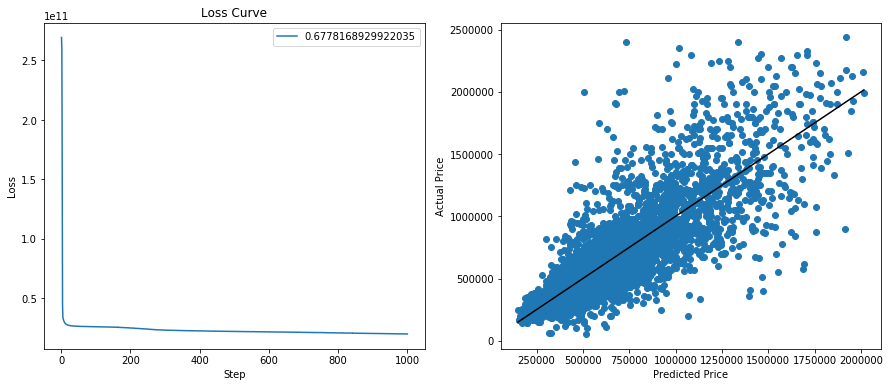

In [17]:
layer = [150, 103, 56, 10]
model_ = neural_network(nn_df, layer)

## PCA clustering
---

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas

### Functions for calculating clustering and intertia

In [23]:
# function for calculate inertia
def cal_inertia(df, k_list):
    # Create an empty list to store the inertia values
    inertia = []
    # Create a for loop to compute the inertia with each possible value of k
    for i in k_list:
        # Create a KMeans model using the loop counter for the n_clusters
        k_mean = KMeans(n_clusters= i, random_state= 0)
        # Fit the model to the data using `df_market_data_scaled`
        k_mean.fit(df)
        # Append the model.inertia_ to the inertia list
        inertia.append(k_mean.inertia_)
    return inertia

In [24]:
def clustering(num_cluster, df):
    # Initialise the K-Means model using the best value for k
    model = KMeans(n_clusters= num_cluster, random_state= 0) 
    # Fit the K-Means model using the original data
    model.fit(df)
    # Predict the clusters to group the cryptocurrencies using the original data
    predictions = model.predict(df)
    
    return predictions

### Reading moditfy the dataframe for PCA

In [25]:
pca_df = original_df.drop(columns= ["SUBURB"])
# , "YEAR_SOLD", "NEAREST_STN_DIST","NEAREST_SCH_DIST"
pca_df.head()

,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
0,565000,600,160,2018,18300,1800,0.828339,15.0
1,365000,351,139,2019,26900,4900,5.524324,6.0
2,287000,719,86,2015,22600,1900,1.649178,36.0
3,255000,651,59,2018,17900,3600,1.571401,65.0
4,325000,466,131,2016,11200,2000,1.514922,18.0


In [26]:
# using StandardScaler to normalize the data
scaled_data = StandardScaler().fit_transform(pca_df)

# Create a PCA model instance and set number of components to 5.
pca = PCA(n_components= 5)

# Use the PCA model with `fit_transform` to reduce to five principal components.
house_pca = pca.fit_transform(scaled_data)

# put it into a new dataframe
house_pca_df = pd.DataFrame(data= house_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"], index= pca_df.index)
house_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.593331,-0.463131,-0.583947,-0.076192,0.524043
1,1.768198,-0.945002,-0.579517,0.613882,-0.248492
2,-0.224955,-1.590551,1.016334,-0.984462,0.072169
3,-0.751931,-1.801886,1.681833,0.925842,-0.344433
4,-0.521202,-0.941029,0.245363,-0.948946,0.388080


In [27]:
# determine how much information can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.28026415, 0.20946913, 0.14853419, 0.12144597, 0.09014412])

In [28]:
# Create a list with the number of k-values from 1 to 10
kValues = list(np.arange(1, 11))

# calculate inertia for pca data
inertia_pca = cal_inertia(pca_df, kValues) # calculate inertia for pca data
print(inertia_pca)

[3315999048738182.0, 1143491648895617.2, 573220470404844.2, 355887340748986.6, 226976156066815.9, 171573089782165.06, 127138598499807.31, 100400915076826.66, 81703323839539.25, 68099235398568.94]


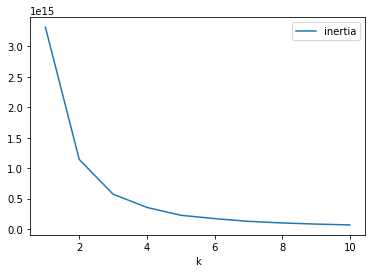

In [29]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame({"k": kValues, "inertia": inertia_pca})
elbow_pca_df.head()

# Plot a line chart to identify the k values
elbow_pca_df.plot(x= "k", y= "inertia")


In [30]:
# Predict the clusters to group them into 3 cluster
predictions_PCA  = clustering(3, pca_df) 
print(predictions_PCA)

[2 2 2 ... 0 2 0]


In [31]:
# Create a copy of the DataFrame with the PCA data
house_pca_cluster_df = house_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
house_pca_cluster_df["predicted clusters"] = predictions_PCA

# Display sample data
house_pca_cluster_df.head()

house_pca_cluster_df.hvplot.scatter(x= "PC1", y= "PC2", 
                                 by= "predicted clusters", size = 1
                                 )

:NdOverlay   [predicted clusters]
   :Scatter   [PC1]   (PC2)

## Kmeans Clustering
---

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
# remove columns before scaling data
df = original_df.drop(columns= ["SUBURB", "NEAREST_STN_DIST", "FLOOR_AREA", "NEAREST_SCH_DIST", "PROPERTY_AGE", "YEAR_SOLD"])
df

,PRICE,LAND_AREA,CBD_DIST
0,565000,600,18300
1,365000,351,26900
2,287000,719,22600
3,255000,651,17900
4,325000,466,11200
...,...,...,...
26256,1460000,222,3200
26257,720000,761,15000
26258,655000,769,51300
26259,520000,494,8500


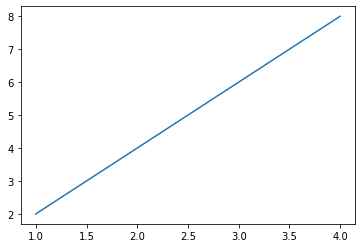

In [54]:
x = (1,2,3,4)
y=(2,4,6,8)
plt.plot(x,y)

In [34]:
# using StandardScaler to normalize the data
scaled_data = StandardScaler().fit_transform(df)

# Create a DataFrame with the scaled data 
df_scaled = pd.DataFrame(scaled_data, columns= df.columns[:], index= df.index)

# Display sample data
df_scaled.head()

,PRICE,LAND_AREA,CBD_DIST
0,-0.220409,-0.120967,-0.106280
1,-0.783822,-0.144277,0.652194
2,-1.003554,-0.109828,0.272957
3,-1.093700,-0.116193,-0.141558
4,-0.896505,-0.133511,-0.732463


In [35]:
# Create a list with the number of k-values from 1 to 11
k_Values = list(np.arange(1, 12))

# Create an empty list to store the inertia values
inertia = cal_inertia(df_scaled, k_Values) # calculate inertia

print(inertia)

[78782.99999999997, 58061.34151750963, 40917.11768827871, 26336.450311638844, 21405.65389248282, 17484.692966173658, 14612.002950024253, 12695.61062241267, 11350.092598816624, 10118.74395137676, 9041.563828863516]


In [36]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({"k": k_Values, "inertia": inertia})
elbow_df.head()

,k,inertia
0,1,78783.000000
1,2,58061.341518
2,3,40917.117688
3,4,26336.450312
4,5,21405.653892


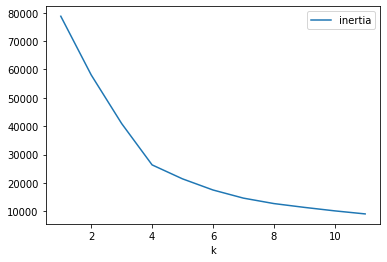

In [37]:
# Plot a line chart with all the inertia values computed with 
elbow_df.plot(x= "k", y= "inertia")

In [38]:
predictions = clustering(4, df_scaled) # getting clustering results
# Print the resulting array of cluster values.
print(predictions)

# Create a copy of the DataFrame
house_cluster_df = original_df.copy()
# Add a new column to the DataFrame with the predicted clusters
house_cluster_df["predicted clusters"] = predictions

# Display sample data
house_cluster_df.head()

[2 0 2 ... 0 2 2]


,SUBURB,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE,predicted clusters
0,South Lake,565000,600,160,2018,18300,1800,0.828339,15.0,2
1,Wandi,365000,351,139,2019,26900,4900,5.524324,6.0,0
2,Camillo,287000,719,86,2015,22600,1900,1.649178,36.0,2
3,Bellevue,255000,651,59,2018,17900,3600,1.571401,65.0,2
4,Lockridge,325000,466,131,2016,11200,2000,1.514922,18.0,2


In [45]:
house_cluster_df.hvplot.scatter(x= "CBD_DIST", y= "PRICE", by= "predicted clusters", size= 1)
# plt.scatter(house_cluster_df["LAND_AREA"], house_cluster_df["PRICE"], color= house_cluster_df["predicted clusters"])

:NdOverlay   [predicted clusters]
   :Scatter   [CBD_DIST]   (PRICE)

In [46]:
# understand the group distribution
count_grp = house_cluster_df.groupby("predicted clusters")
# create a dataframe for easier visualise data
count_grp_df = count_grp["PRICE"].count().reset_index()
count_grp_df = count_grp_df.rename(columns= {"PRICE": "count"})
count_grp_df

,predicted clusters,count
0,0,7073
1,1,3575
2,2,15589
3,3,24


In [47]:
# median of each column
median_grp = house_cluster_df.groupby("predicted clusters").median()
median_grp

,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
predicted clusters,,,,,,,,
0,436000.0,672.0,173.0,2018.0,32900.0,3300.0,1.566972,16.0
1,1265000.0,704.0,248.0,2017.0,9100.0,2400.0,1.221844,26.0
2,527000.0,614.0,156.0,2018.0,14500.0,3200.0,1.259451,24.0
3,997500.0,254766.0,220.0,2015.0,42350.0,25450.0,10.873060,21.5


In [48]:
# mean of each column
mean_grp = house_cluster_df.groupby("predicted clusters").mean()
mean_grp

,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,PROPERTY_AGE
predicted clusters,,,,,,,,
0,4.815417e+05,3240.986003,181.332956,2017.380037,34725.618549,6192.779584,2.492724,20.110703
1,1.360796e+06,2330.029930,254.643916,2017.262378,10556.022937,2928.975664,1.430604,35.933706
2,5.513722e+05,742.093784,165.210469,2017.413433,14613.963436,3715.954648,1.427246,28.252935
3,1.083854e+06,286259.958333,234.041667,2015.458333,43887.500000,23212.500000,11.435447,30.500000


## Extracting different clusters to create better model
---

In [49]:
# set up required columns
columns = ['PRICE', 'LAND_AREA', 'FLOOR_AREA', 'YEAR_SOLD', 'CBD_DIST', 'NEAREST_STN_DIST', 'PROPERTY_AGE']

In [50]:
# cluster 0 dataframe
cluster_0_df = house_cluster_df.loc[(house_cluster_df["predicted clusters"] == 0), columns].dropna().reset_index(drop= True)
cluster_0_df

,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,PROPERTY_AGE
0,365000,351,139,2019,26900,4900,6.0
1,409000,759,118,2013,27300,1000,22.0
2,400000,386,132,2016,28200,3700,2.0
3,370000,468,158,2019,41700,1100,6.0
4,367500,398,158,2018,36300,2100,15.0
...,...,...,...,...,...,...,...
7068,210000,399,178,2014,26200,2200,-1.0
7069,575000,773,200,2018,26500,856,29.0
7070,395000,420,164,2020,39700,1400,7.0
7071,395000,335,162,2015,35600,2800,5.0


In [51]:
# cluster 1 dataframe
cluster_1_df = house_cluster_df.loc[(house_cluster_df["predicted clusters"] == 1), columns].dropna().reset_index(drop= True)
cluster_1_df

,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,PROPERTY_AGE
0,1950000,855,305,2018,10800,2900,37.0
1,1260000,354,227,2016,12900,387,16.0
2,1100000,619,150,2016,8800,658,71.0
3,1310000,544,246,2019,8700,4400,9.0
4,1350000,802,266,2018,12000,3500,6.0
...,...,...,...,...,...,...,...
3570,975000,995,136,2018,9800,1900,51.0
3571,1200000,25235,280,2014,25100,7200,7.0
3572,1335000,1214,182,2016,8800,6000,53.0
3573,1100000,451,243,2018,13600,2200,17.0


In [52]:
# cluster 2 dataframe 
cluster_2_df = house_cluster_df.loc[(house_cluster_df["predicted clusters"] == 2), columns].dropna().reset_index(drop= True)
cluster_2_df

,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,PROPERTY_AGE
0,565000,600,160,2018,18300,1800,15.0
1,287000,719,86,2015,22600,1900,36.0
2,255000,651,59,2018,17900,3600,65.0
3,325000,466,131,2016,11200,2000,18.0
4,565000,875,168,2020,12100,2500,37.0
...,...,...,...,...,...,...,...
15584,475000,691,125,2018,16400,2000,33.0
15585,420000,2090,143,2018,20100,5900,79.0
15586,720000,761,150,2014,15000,2300,44.0
15587,520000,494,130,2015,8500,3500,5.0


## Optimisation of Neural Network

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


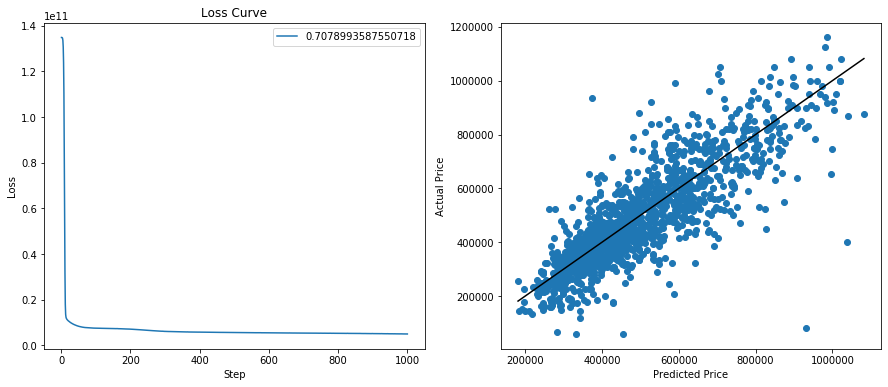

In [55]:
# cluster 0 model
layer = [150, 103, 56, 10]
model_0 = neural_network(cluster_0_df,layer)

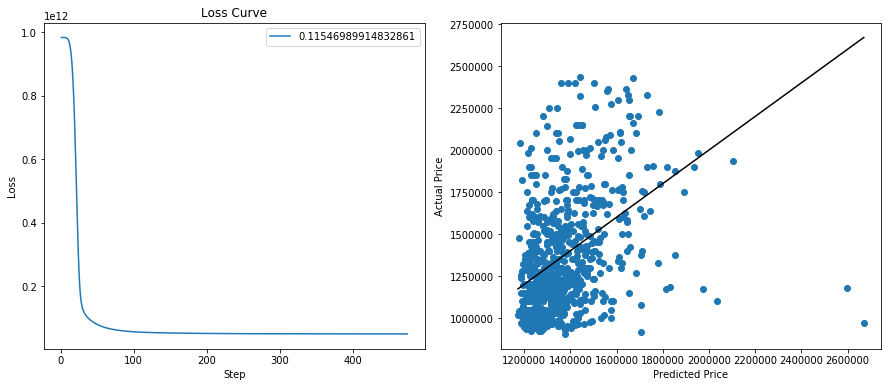

In [56]:
# cluster 1 model
layer = [150, 103, 56, 10]
model_1 = neural_network(cluster_1_df,layer)

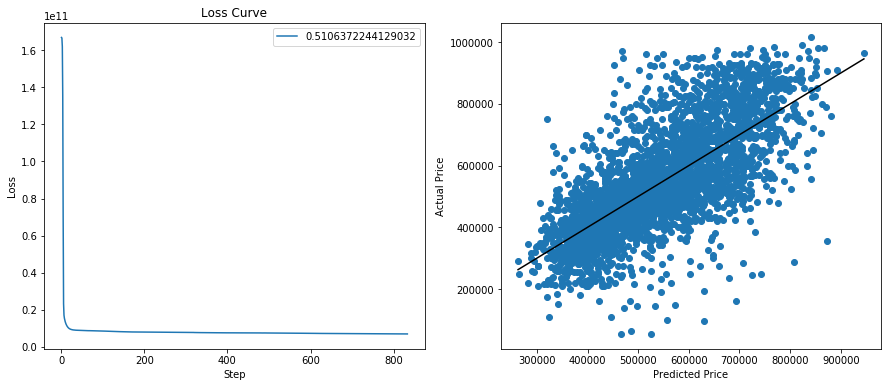

In [57]:
# cluster 2 model
layer = [150, 103, 56, 10]
model_2 = neural_network(cluster_2_df,layer)

## Grouping cluster 1 and 2 to improve the model
---

In [59]:
cluster_1_2_df = house_cluster_df.loc[(house_cluster_df["predicted clusters"] == 2)|(house_cluster_df["predicted clusters"] == 1), columns].reset_index(drop= True)
cluster_1_2_df.head()

,PRICE,LAND_AREA,FLOOR_AREA,YEAR_SOLD,CBD_DIST,NEAREST_STN_DIST,PROPERTY_AGE
0,565000,600,160,2018,18300,1800,15.0
1,287000,719,86,2015,22600,1900,36.0
2,255000,651,59,2018,17900,3600,65.0
3,325000,466,131,2016,11200,2000,18.0
4,565000,875,168,2020,12100,2500,37.0


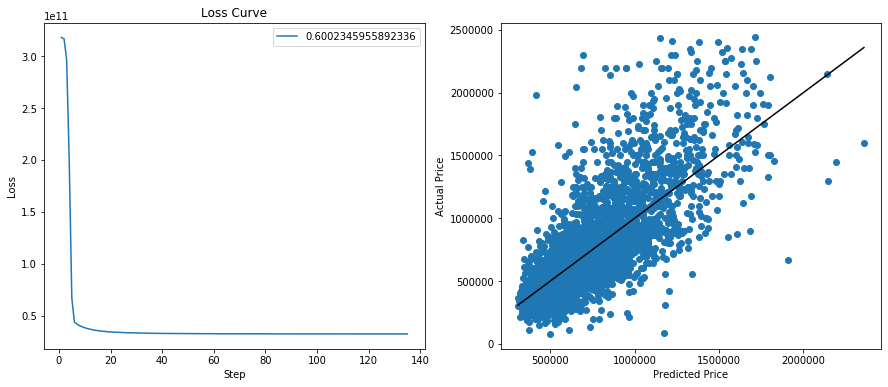

In [60]:
# cluster 1 and cluster 2 model
layer = [150, 103, 56, 10]
model_1_2 = neural_network(cluster_1_2_df,layer)